## Assignment 3
_Group 11: Alexandra Parkegren & Albin Sjöstrand_

_Hours spent: `2 * 20 = 40h`_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data_all.csv")
df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


___
### PART 1: Visualise the Data


***1. Show the distribution of phi and psi combinations using:***

***a. A scatter plot***


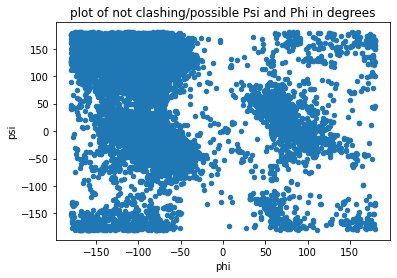

In [ ]:
df_phi_psi = df[['phi', 'psi']]
df_phi_psi.plot.scatter('phi', 'psi',title='plot of not clashing/possible Psi and Phi in degrees')
plt.show()

***b. A heatmap***

We need to decide which value of n_samples we'll use...
n_sampels = the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

Depending on how much data we include the heatmap will change. Beneath we included all of our data.


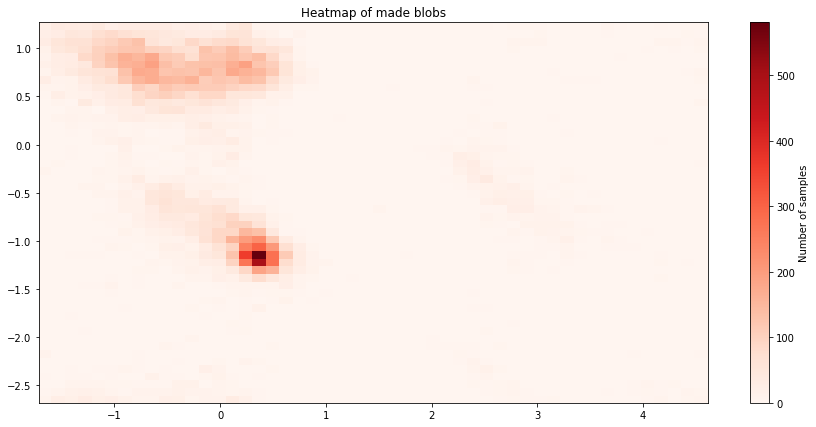

In [ ]:
#if we want to see a heatmap for less of our data we use make_blobs
#X, labels_true = make_blobs(n_samples=1000, centers=df_phi_psi, cluster_std=1.0, random_state=0)

X = df[['phi', 'psi']]
X = StandardScaler().fit_transform(X)

# Set size of the figure
plt.figure(figsize=(15, 7))

# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X[:,0], X[:,1], bins=50, cmap='Reds')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.
plt.title('Heatmap of made blobs')

# Show the plot
plt.show()

---
### PART 2: K-Means Clustering

***2. Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.***

***a. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.***



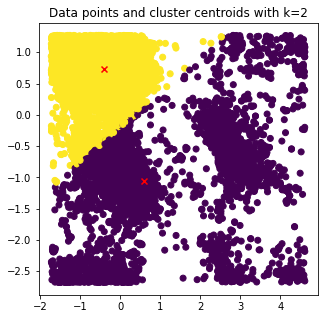

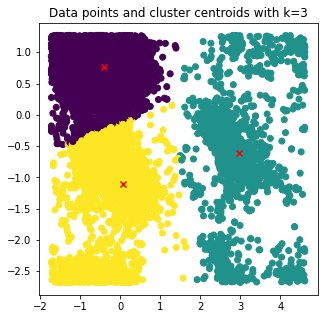

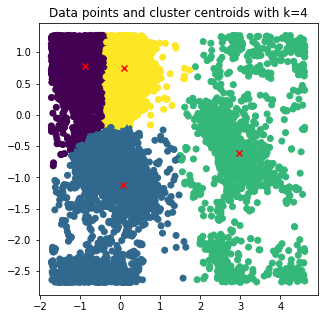

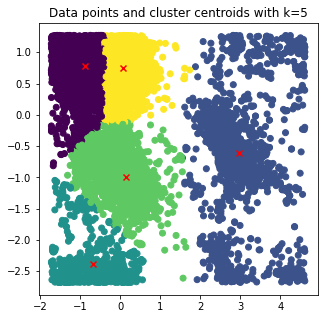

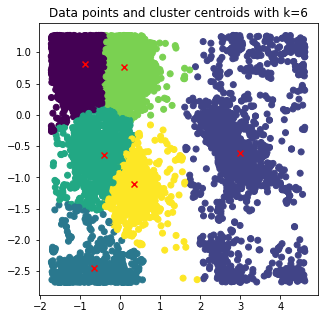

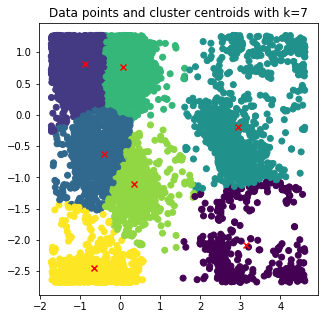

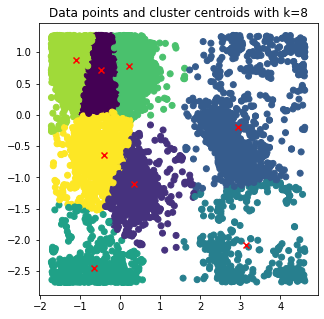

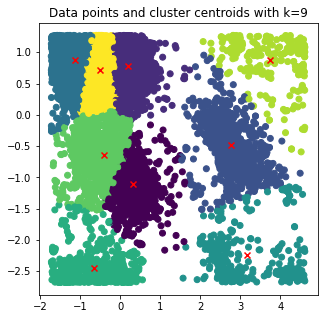

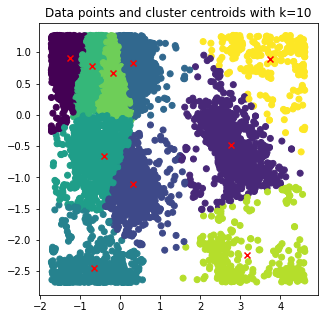

In [ ]:
#values to choose
ks = [2,3,4,5,6,7,8,9,10]
n_sampl = len(df_phi_psi)

# using all data points
X = df[['phi', 'psi']]
X = StandardScaler().fit_transform(X)

#one plot for each k
for i in ks:
    plt.figure(figsize=(5,5))

    # Specify the number of clusters (4) and fit the data X
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    y_kmeans = kmeans.predict(X)

    # Plotting the cluster centers and the data points on a 2D plane
    plt.scatter(X[:,0], X[:,1],c=y_kmeans, cmap='viridis')

    # Perform K-Means clustering    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x',c='red')
    
    plt.title('Data points and cluster centroids with k={0}'.format(i))
    plt.show()


The result can vary because the inital centroids are randomly choosen each time the clustering
algorithm is run. This means that we can be unlucky with the centroids and therefore get "bad"
points the algorithm calculates from. This can be solved by being "clever" as in choosing "good"
initial centroids, to have good distribution accross the dataset. By only selecting centroid where
there is less dissimilarities than what the best has. In this case we're not going to
intervene with what the algorithm chose.

From our plots above we think that the top three choices for best clustering is k=4 or k=6 or k=8 depending on what we value.

k=4 gives separate clusters but combine all the data on the right side into one

k=6 gives a includes a new cluster, but also splits the upper left into two 
clusters and the middle right cluster shift its cluster center.

k=8 inlcudes, as far as we can see, all data but it splits the larger clusters.
Considering the sparser clusters in the upper right and lower left corners looking 
like several clusters themselves, do we want them to split as well?

Should we interpret the lowest right cluster as noise and stick whith k=4?
Or chould we accept splitted cluster to include more data with a bigger k?

It would be nice if the code could consider larger radius for bigger cluster and smaller 
for sparse clusters. Make_blobs at row 5 use the default value for cluster size: cluster_std=1. 
This could be changed to a smaller value to notice more sparse cluster.
But a too small value will split big clusters into several and we are back to the same problem. Therefor we have not altered cluster_std.

The default number of points is 100 but when we tried this we thought too much of our large amount of data was removed.
All this is based on the fact that we instead chose to include all of our 20000+ data points (row 3:n_sampl = len(df_phi_psi)).
According to lecture 6; A stable cluster can be validated by removing a proportion of random points and conclude that this does not change the clustering fundamentally.
Considering this, we understand that removing points will eleminate the sparse cluster in the 
upper right corner and lower right corner from forming clusters. This means k=6 and k=8 is just unnecceray and our choice of k is 4.


***b. Validate the clusters that are found with the chosen value of K. Hint: See the slides for Lecture 6, Section Validating clustering.***

As mentioned above; "A stable cluster can be validated by removing a proportion of random points and conclude that this does not change the clustering fundamentally".
We therefor will remove some proportion to see if we chose a good value for k. An easy way to only use some data is make_blobs.


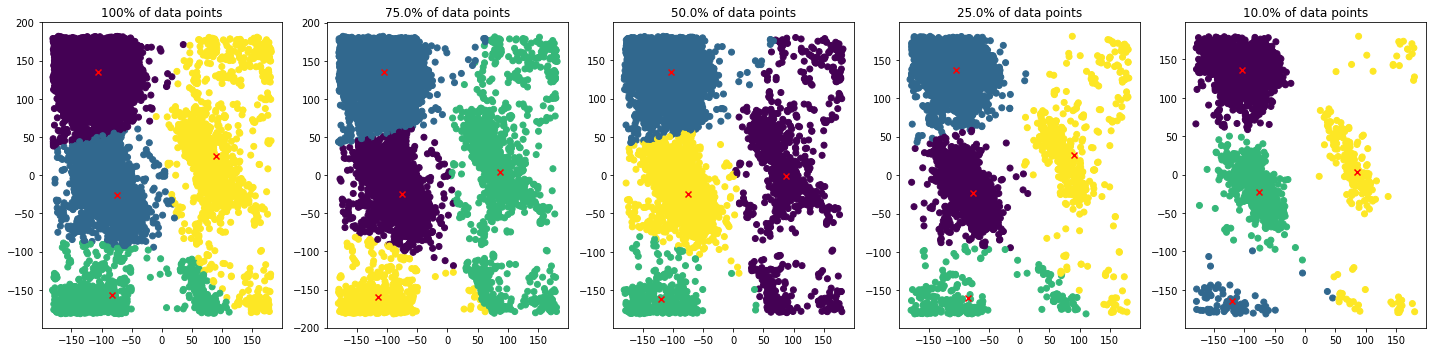

In [ ]:
# Selecting k as 4
k=4
lengths = [1,0.75,0.5,0.25,0.10]

fig, axs = plt.subplots(1, len(lengths), figsize=(20,5))

for i in range(0,len(lengths)):
    # choosing different sample lengths for the plots to show difference in centroids being selected
    n_sampl_size    = int(len(df_phi_psi)*lengths[i])

    # create blobs of the data in order to change the sample sizes
    X, y = make_blobs(n_samples=n_sampl_size, centers=df_phi_psi)

    # Specify the number of clusters (4) and fit the data X
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # predicting the kmeans for each dataset to be used for plotting with colors
    y_kmeans = kmeans.predict(X)
    
    axs[i].scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis')

    # Plott kmeans cluster centers    
    axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x',c='red')
    axs[i].set_title('{0}% of data points'.format(lengths[i]*100))

plt.tight_layout()
plt.show()

We decided the different proportions to be a percentage of the number of datapoints, spanning from 100% to 10%, in order to see the difference in where the
centroids are choosen. We based this on that we needed a proportion in order to see if the clustering is changing fundamentally.

By changing the sample size of the clustering, we can see the stability of the clustering. And as we can see in the plots above, when removing different sized samples
in the different plots, the centroids does not change drastically, indicating on stability for clustering with k=4. We can see that the different clusters
change in color for different sample sizes meaning that the data points are not the same for all, despite that we can see that the centroids are in similar
for all samples. Some instability can still be seen, espesially for the centroid at the bottom of the plots, but which we will bring up solution for under 
question 1 d).

Another way to validate our cluster is to use the silhouette coefficient. 
The higher the score the better the defined the models clusters are.

In [ ]:
X = df[['phi', 'psi']]

# Specify the number of clusters (4) and fit the data X
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Silhouette Coefficient between best value 1 and worst value -1
score = metrics.silhouette_score(X, labels, metric='euclidean')

print(score)


# lets try a bad one
kmeans2 = KMeans(n_clusters=10, random_state=0).fit(X)
labels2 = kmeans2.labels_
score2 = metrics.silhouette_score(X, labels2, metric='euclidean')
print(score2)

0.6674437338553395
0.43422670042527095


Silhouette coefficient has a range of -1 and 1. The closer to 1, the better clustering by the method. 
In our case we get what it appears to be a good score, since it's close to 1. 
But at the same time it's hard to define what is considered to be a good or a bad score. In the code above we get a better score
when running with `k = 4`, compared with `k = 10`, which gives us atleast an indication of choosing the right value. 

***c. Do the clusters found in part (a) seem reasonable?***

By looking ourself at the plot we see some clusters that k=2 clearly does not correspond to our expectations. 

If we look at the plot with all data points there are barely any clear separate clusters.
This mix of clusters makes the decision of the correct number of clusters, even for the human eye, hard to decide and so the question 
if the clusters found by the computer are reasonable, is also hard to give a clear answer to.
When we look for three clusters we might agree with the computer or we could consider the left one to be one single cluster and the 
right one as one and the bottom as another, which does not correspond to what the computer see.

If we ourself decide to look for four clusters, we definitely think that the computer did a good reasonable job. But when k is larger than four the data slipts clusters and see new ones whilst our eyes only see new clusters and no splitting.


**d. Can you change the data to get better results (or the same results in a simpler way)?**
**(Hint: since both phi and psi are periodic attributes, you can think of shifting/translating them by some value and then use the modulo operation.)**

As mentioned before, we can be very unlucky with which random centroids are chosen and therefore get "bad"
points the algorithm calculates from. An improvement to this is to intentionally decide on where the initial
centroids will be, to guide the algorithm to the right clustering. This is ofcourse not always possible, but
depends on the knowledge of the domain. If we for example would know from previous knowledge that we are going
to have 4 clusters in 4 quadrants, we can place the initial centroids there to have a more accurate result. The
algorithm can then be improved with calculating the best KMeans of the points, and for a number of tests we can
see if the new chosen KMeans are less dissimilar than the "best" values, otherwise we chose the best values.


In most cases we need to preprocess the data with z-scaling, meaning that the features in the data have different
dynamic ranges. In this case it would not change the result since the features, _phi_ and _psi_, we're using are angles with
the same range, i.e. 0 - 360. But if we would have used more features in the dataset, such as the position, it
would note have the same range: The range between 10 and 11 degrees will not be the same as the range between
position 10 and 11. In this case the change would be smaller than say if we had a feature with range between 0
and 1. To combat that the lowest value would become a 0 and the highest
value becomes a 1 for all features, and then linear interpolation is done for the range of 0 to 1, equalling all
the features to have the same dynamic range and therefore no attribute would dominate in the clustering.


The angles go from -180 degrees to 180 degrees. 
These two are the same angle and should be the same data, aka we could remove data for one of them ans only save one.

The data is plotted from -180 to 180 degrees, this is a reference to the angles which means the 
data plottet at a straight line is really a closed trail. If we consider this for _phi_ then the correct axis 
will be a cylinder, and if we consider this for _psi_ as well the plot could turn in to some kind of sphere.
If we would look at this strange sphere, will any of the clusters change? In the plot above alot of the data is 
located at the edges so yes we think the clusters would change.
To avoid splitting clusters when we choose our axis, if we want to plot 2D, we want the axis to start and end in between clusters.
Instead of plotting phi:(-180,180) and psi:(-180,180) we look at our plot in 1a and believe a better plot would be phi:(0,0) (-110,-110).

To do this we first need to merge the data for -180 and 180. Then we need to change the axis and which creates another
way to plot the data and find new clusters. The axis for phi would go (0,..,179,180,-179,-178,..,0) counting up 
and then down. The psi axis will need to calculate down, then up and then down (-110,-109,..,-1,0,1,..,179,180,-179,..,-111,-110).
To avoid using negative values we could translate the interval (-180,180) to (0,360). 
Psi axis then equals 0 to 360 degrees.
0-180 is the same and for the negative values, we can say use 360+(x).
Phi would become (250,..,360,1,..,249) but we choose to shift it only 110.



<Figure size 720x720 with 0 Axes>

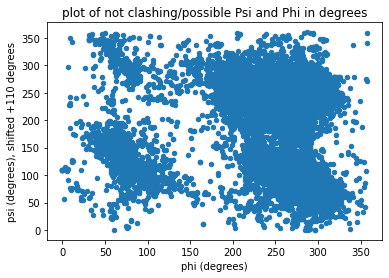

In [ ]:
#create a new row with GDP (Generates warning which we can't resolve)
df['phi 0-360'] = df.apply(lambda row: ((row['phi']+360)%360), axis=1)
df['psi 110-470'] = df.apply(lambda row: ((row['psi']+110)%360), axis=1)

plt.figure(figsize=(10,10))
df.plot.scatter('phi 0-360', 'psi 110-470',title='plot of not clashing/possible Psi and Phi in degrees')
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees), shifted +110 degrees')
plt.show()

Here below we quickly add how the k-means will work on the shifted dataplot. 
Instead of finding the cluster at the upper left corner kmeans will split the cluster in the upper right corner if we want 4 clusters.
Therefor we stop at 3 clusters.

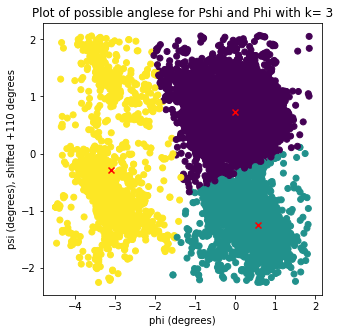

In [ ]:
# using all data points
X = df[['phi 0-360', 'psi 110-470']]
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(5,5))

# Specify the number of clusters (4) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:,0], X[:,1],c=y_kmeans, cmap='viridis')

# Plotting clusters centers   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x',c='red')
    
plt.title('Plot of possible anglese for Pshi and Phi with k= 3')
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees), shifted +110 degrees')
plt.show()


___
### PART 3: DBSCAN

**3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Estimated number of clusters: 2
Estimated number of noise points: 402


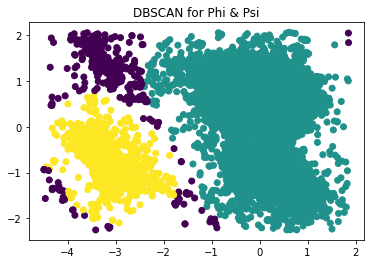

In [ ]:
# create a dbscan clustering function
# Takes the sample data, maximum distance between two samples for the same cluster, and the min samples
def dbscan(X, eps, min_samples):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='viridis')
    plt.title("DBSCAN for Phi & Psi")

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)


X = df[['phi 0-360', 'psi 110-470']]
dbscan(X, 0.6, 200)

Above is the correct method of using dbscan. 
But to just randomly guess values as input for dbscan was not an easy task. 
We need a more structured way of finding epsilon and min_sampl.



Epsilon is the maximum distance between the furthest two points in one same neighbourhood.
Min_sampl is the number of samples, or total weight, in a neighborhood for a point to be considered as a core point. 

To try to decide what epsilon and min_sample values to use we look at the default values for these parameters. 
Default for n_sample is 100. We think this is too small for our large amoung of data 
so we will investigate some different values for n_sample. 
Default for epsilon is 0.5 and 5 for min_sampl and consequently we'll try different values close to these.


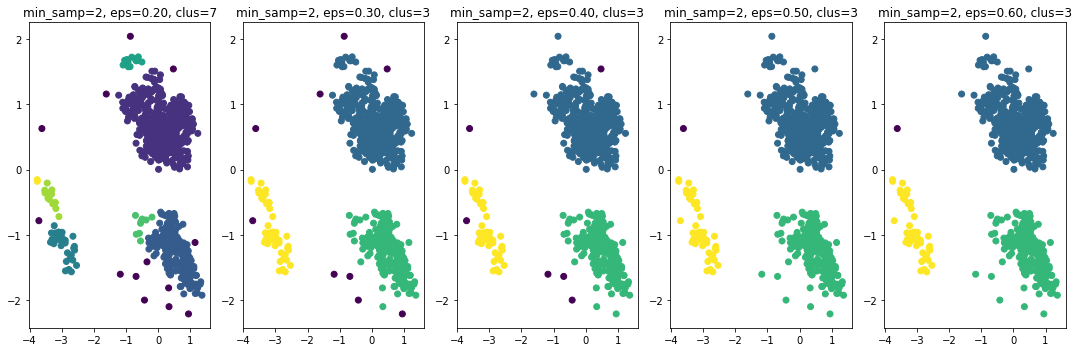

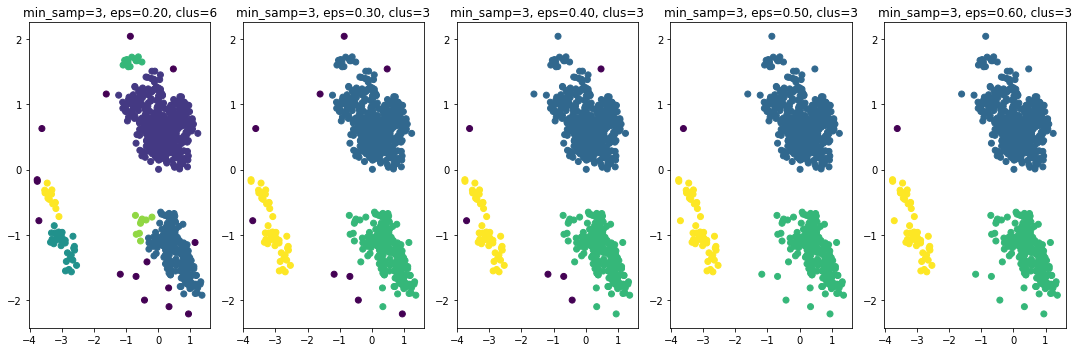

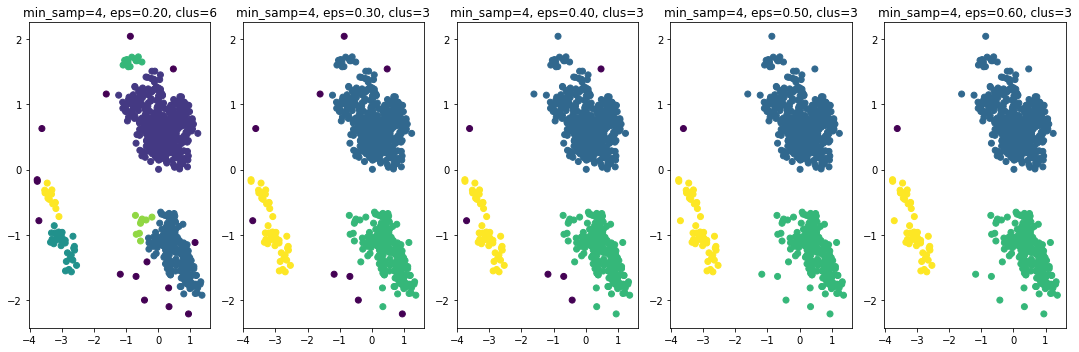

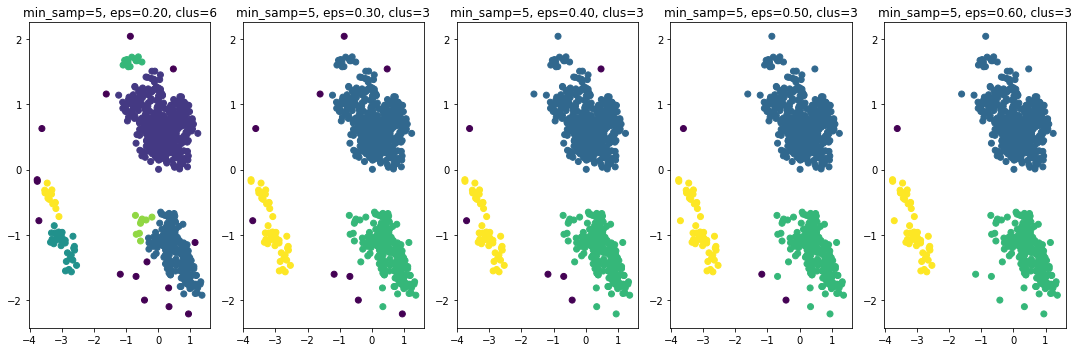

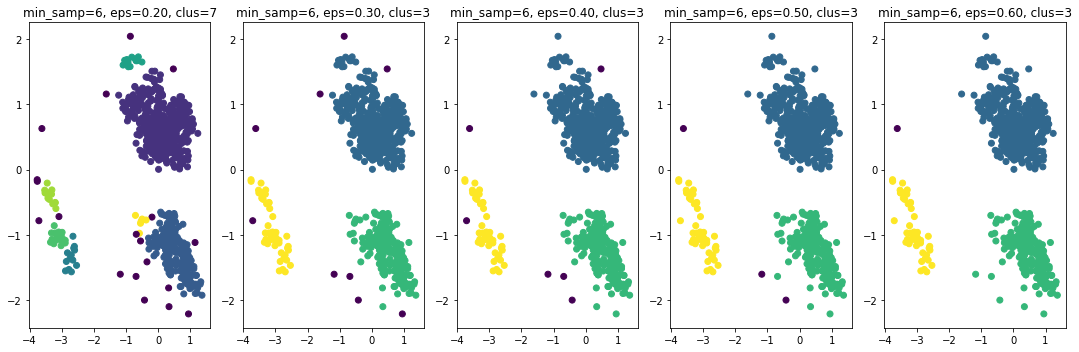

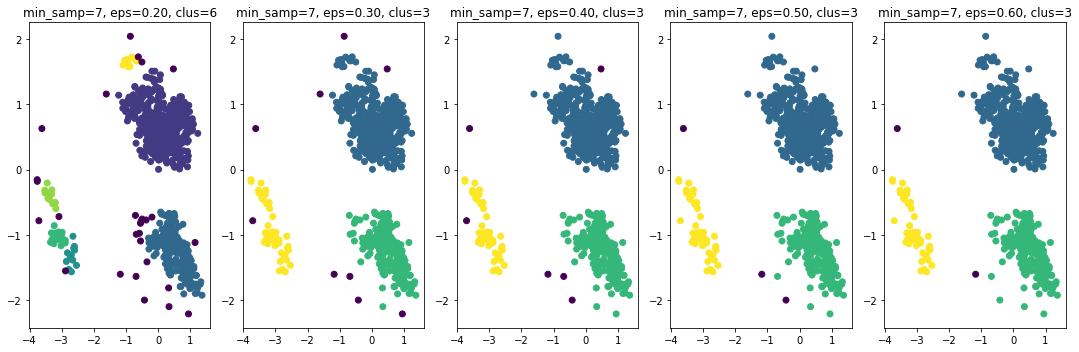

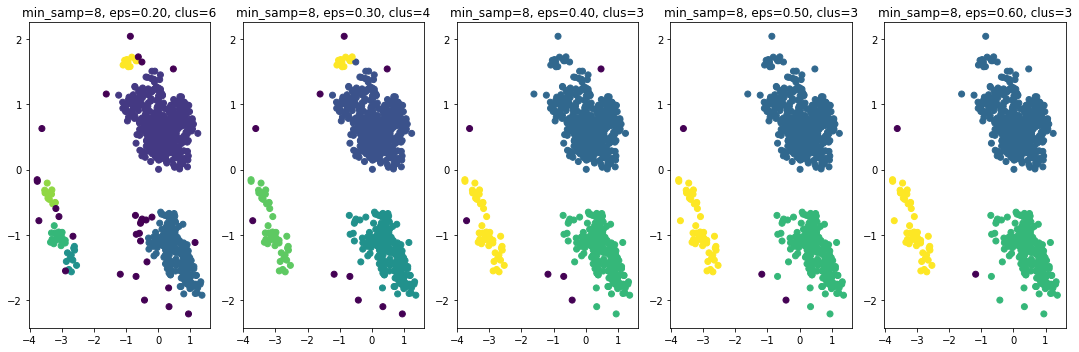

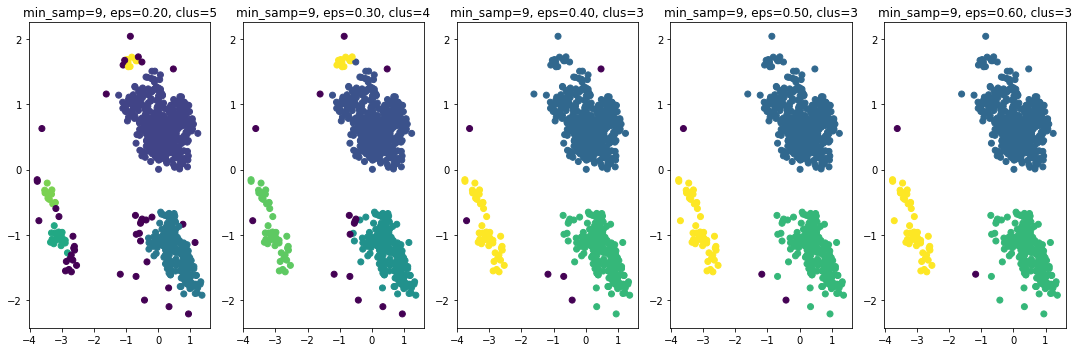

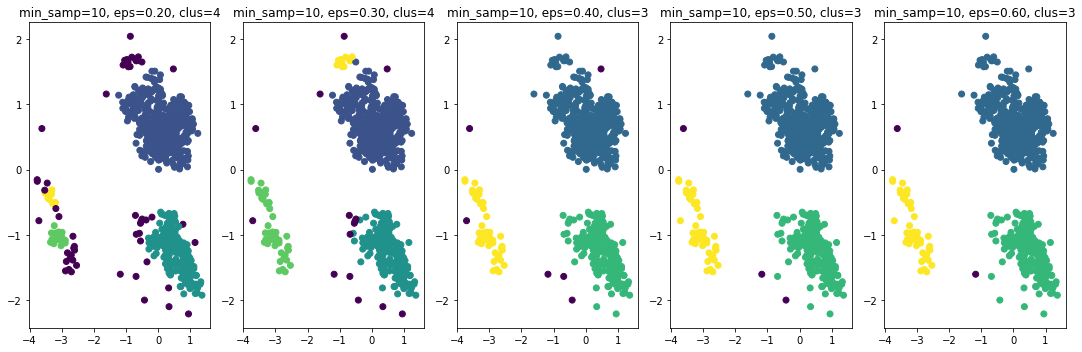

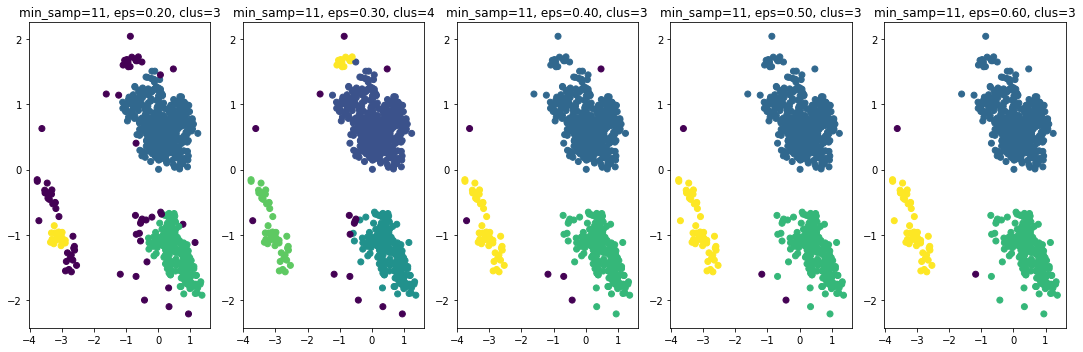

Number of data points used: 750


In [ ]:
#input values 
n = 750
s = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
e = [0.2,0.3,0.4, 0.5, 0.6]

#n = len(df)
#s = [180,190,200,210,220]
#e = [0.3,0.4,0.5,0.6]

col_lenght = len(s)
row_lenght = len(e)

if n==len(df):
  X = df[['phi 0-360', 'psi 110-470']]
else:
  X, y = make_blobs(n_samples=n, centers=df[['phi 0-360', 'psi 110-470']])        
X = StandardScaler().fit_transform(X)


#plot different rows for different min_samples
for j in range(0, col_lenght):

    #plot one row with different epsilon
    fig, axs = plt.subplots(1, row_lenght, figsize=(15,5))
    for i in range(0, row_lenght):
    
        # create a dbscan clustering function
        # Takes the sample data, maximum distance between two samples for the same cluster, and the min samples
        db = DBSCAN(eps=e[i], min_samples=s[j]).fit(X)
    
        # Number of clusters in labels, ignoring noise if present.
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        #n_noise_ = list(labels).count(-1)

        y_pred = db.fit_predict(X)

        axs[i].scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')  
        axs[i].set_title('min_samp=%d, eps=%.2f, clus=%d' %(s[j],e[i],n_clusters))
    plt.tight_layout()
    plt.show()

print('Number of data points used: %d' %n)

By trying different values on the input values we conlcude:

The best results given for n_sampl=500 is when eps=0.4 and min_sampl=(2,..,9)

The best results given for n_sampl=750 is when eps=0.3 and min_sampl=(2,..,7)

The best results given for n_sampl=1000 is when eps=0.3 and min_sampl=(2,..,10)

The best results given for n_sampl=2000 is when eps=0.3 and min_sampl=(12,..,16)

The best results given for n_sampl=3000 is when eps=0.3 and min_sampl=(21,..,36)

All above will give three similar clusters.At 3000 samples the clusters on the right will start to interwine and at a even higher 
samples a new cluster will start to emerge in the upper left corner. This will shift what 
clusters we are looking for and which results are good.

Some good results are given for n_sampl=10 000 is when (eps,min_sample) = ((0.4,20),(0.5,35),(0.6,65),(0.7,90))
When epsilon increases, min_samp increases.

Some good results are given for n_sampl=20 000 is when (eps,min_sample) = ((0.4,65),(0.5,90),(0.7,150),(0.7,200),(0.8,210))

A few good results for n_sampl=29 368 = all of our data is when 
(eps,min_sample) = ((0.6,170),(0.6,200),(0.7,250))

But if we want more noise other good results for n_sampl=our data is when
(eps,min_sample) = (0.5,200)

Is there a better and faster way to find the values for epsilon and min_samp whitout plotting and looking ourselves?
Let's try the elbow method. 


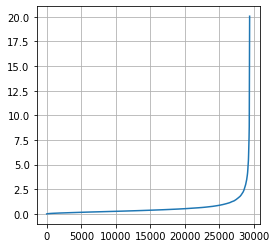

For 29369 number of samples we get:
Estimated epsilon = 1.29
Estimated minimum number of samples = 10.29


In [ ]:
# CHOSING NUMBER OF SAMPLES
n = len(df)

if n==len(df):
  X = df[['phi 0-360', 'psi 110-470']]
else:
  X, y = make_blobs(n_samples=n, centers=df[['phi 0-360', 'psi 110-470']])        


# ESTIMATING EPSILON using the elbow method
neigh = NearestNeighbors(n_neighbors=2) # create neibours with with the compared point included
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0) #sort distances
distances = distances[:,1]

# plot the sorted values
plt.figure(figsize=(4,4))
plt.plot(distances)
plt.grid(True)
plt.show()

#ESTIMATING MIN SAMPLES
min_samp_estimated = np.log(n) # np.log <=> ln. Helpful to get a hum about the value


#viewed point of elbow from plot 
epsilon_estimated = distances[27000]

print('For %d number of samples we get:' % n)
print('Estimated epsilon = %.2f' % epsilon_estimated)
print('Estimated minimum number of samples = %.2f' % min_samp_estimated)

From these methods we got: 

for n_sample = 500, eps=9.44, min_sampl=6.21

for n_sample = 1000,eps=4.86, min_sampl=6.91

for n_sample = 3000,eps=4.11, min_sampl=8.01

for n_sample = 29300,eps=1.35, min_sampl=10.29

**a. i. Motivate the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point**

Choosing the minimum number of samples is very dependent on what we want from this data, and the value we choose cannot be generalized for other datasets.
It's often a good thing not to choose a too small value since it will create clusters for noise or outliers. 
It's often set by domain experts, which we are not, and even then it's hard since we normalize the values. 

This was a diffucult task and it took a lot of time and computer effort testing it by hand. 
To get an estimation for what the min_samples can be, we instead found a that there exist a rules of thumb to use ln of the size of the data. 
We'll use this as a starting point from where to evaluate what value to choose. 
We do not explicitly use the result but rather try what works best for the sample size we chose, 
and then use this rule of thumb to have a starting point.

Comparing our result from this method with what we produced ourself by testing. 
We conclude that is worked quite well for data with less up to about 1000 datapoints, but not beyond that.
Therefor we also conclude this rule of thumb to not be generalized for all different kind of datasets, 
which includes our own full dataset with around 2900 datapoints.

From our tests and this we can conclude that up to a 100 datapoints a good start for min_samp is 6.
But as the number of data increse, the min_samp need to increase as well.

To use bdscan on our data we found, by testing and decidiong ourself how much noise we liked, 
the best value for min_samples was 200 (in conjunction with epsilon=0.5). In the end we ourself 
made the desicion of what was a good value or not by looking at the plots.
We could have refined this by using some validations insted like silhouette score.



**a. ii. Motivate the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).**

The reasoning for choosing epsilon is the same as the minimum number of samples; 
it's very dependent on the data we have and what we want to show with the results. 

One way is to establish constraints for the maximum distance between two points, 
which we've done in the calculation for the plot above. 
We tried using Nearest Neighbors to calculate the distances, sort them, and then 
find the _elbow_ to choose the epsilon from. 
We used this the same way as for min samples, as a helper for us to find an indication of suitable values for our data. 

But comparing the values to what we first found, this method did not deliver.
We can see that the elbow method decreases for larger amount of data which indicates that this method might still 
be useful but for a much bigger amount of data.
Instead we realised that epsilon already had a great value at 0.3 and for a bit more data it increased just a tiny bit.

Again, by testing and deciding ourself how much noise we liked, 
the best value for epsilon for our amount of data was 0.5 (in conjunction with min_sample=200).



***b. Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found?***

***Plot a bar chart to show which amino acid residue types are most frequently outliers.***

Dbscan will label everything that will be in a cluster as -1.
According to [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
the datapoint given the label -1 are called noise. Outliers will not be included in clusters, neither will noise. 
Henceforth we therefore reference to outliers as noise.

Estimated number of noise: 53


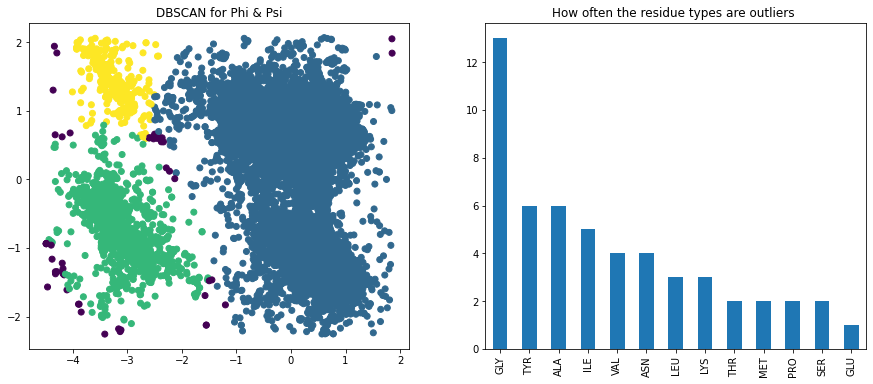

In [ ]:
from numpy import random, where

data = df[['phi 0-360', 'psi 110-470']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# create a dbscan clustering function
# Takes the sample data, maximum distance between two samples for the same cluster, and the min samples
def dbscan(X, eps, min_samples):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    # Number of clusters in labels, ignoring noise if present.
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    y_pred = db.fit_predict(X)
    ax1.scatter(X[:,0], X[:,1],c=y_pred, cmap='viridis')
    ax1.set_title("DBSCAN for Phi & Psi")

    # creting a new column with labels of being in a neighborhood or noise
    df['labels'] = list(labels)

    #filter out and only keep the noise 
    noise_df = df[(df['labels'] == -1)]
    bar = noise_df['residue name'].value_counts(sort=True).plot.bar()
    bar.set_title('How often the residue types are outliers ')


    print('Estimated number of noise: %d' % n_noise_)
   
dbscan(data, 0.6, 180)

***c. Compare the clusters found by DBSCAN with those found using K-means.***

 DBSCAN: | K-MEANS :
- | - 
![alt](./dbscan.png) | ![alt](./k_means_plot.png)

Both these method require that we know what kind of resuls we want from these clustering methods, with K-means require us
to specify _k_ and DBSCAN with _eps_ and *min_samples*. It's often easier to test for different ks in K-means since the 
method is faster, especially with larger dataset such as the one used in this assignment. Comparing that to dbscan, where
it takes significantly longer to calculate the clusters, but with the result being more resonably split.

DBSCAN can find noise/outliers in the dataset, while K-means treats them as part of clusters. DBSCAN is also a better method 
to find the smaller clusters, since we can specify the minimum amount of points that should be part of a neighborhood. On the 
other hand we have to choose which data should be part of clusters or not, depending on the density. In this case, the yellow cluster 
is it's own since we specified that it can be less dense. Otherwise if we would specify that clustering should have higher density,
then the blue cluster would be split into two, but the yellow would be considered noise (more similar to what K-means did with K=3).

Altough DBSCAN is more sensitive to what input we choose, we also have the ability to tweek it according to what result we want. Compare
that to K-means where the only parameter we change is the value of k, and then let the algorithm decide on whats "best" clustered.

***d. Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or
“epsilon”).***

Dbscan is very sensitive to changes of input values. 
From our tests we conclude that small changes of epsilon results in huge changes 
while the input for minimum number of samples can vary more.



___
### PART 4: The data file can be stratified by amino acid residue type.

***a. Use DBSCAN to cluster the data that have residue type PRO. ***
*** Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters ***
***(i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).***

***Remember that when doing clustering using DBSCAN for a) and b) here, the parameters might have to be adjusted from those used in previous questions.***


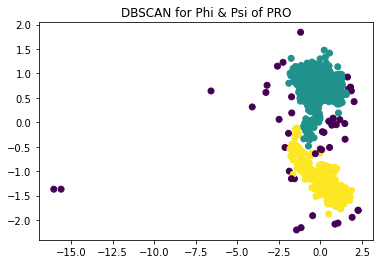

In [ ]:
# create a dbscan clustering function
# Takes the sample data, maximum distance between two samples for the same cluster, and the min samples
def dbscan(X, eps, min_samples):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    # Number of clusters in labels, ignoring noise if present.
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='viridis')
    plt.title("DBSCAN for Phi & Psi of PRO")

#filter out  and keep only pro
df_pro = df[(df['residue name'] == 'PRO')]

X = df_pro[['phi 0-360', 'psi 110-470']]
dbscan(X, 0.3, 14)

We decide not to go back to using the original axis and 
instead continue to use the shifted values because 
PRO fitted nicely into this and is now easy to compare to previous dbscan.

The amount of data for pro was len(df_pro)=1596 and from what we gathered before about what min_samp and eps to choose according to data size, 
we chose min_samp=14 and epsilon=0.3. This gave a reasonable nice plot and cluster

Compare to previos dbscan plots clusters, the datapoints for the residue type 
PRO are almost all in one cluster that we had before and obviously the datapoints that now is considered noise is not certain to be labelled noise when looking at all data.


***b. Now use DBSCAN to cluster the data that have residue type GLY. ***
***Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters.***

***Remember that when doing clustering using DBSCAN for a) and b) here, the parameters might have to be adjusted from those used in previous questions.***


Estimated number of clusters: 4


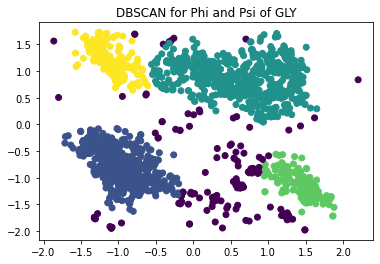

In [ ]:
#filter out and only keep the noise 
df_gly = df[(df['residue name'] == 'GLY')]

X = df_gly[['phi 0-360', 'psi 110-470']]

# create a dbscan clustering function
# Takes the sample data, maximum distance between two samples for the same cluster, and the min samples
def dbscan(X, eps, min_samples):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='viridis')
    plt.title("DBSCAN for Phi and Psi of GLY")

    print('Estimated number of clusters: %d' % n_clusters_)
    
#dbscan(X, 0.3, 14)
dbscan(X, 0.3, 70)

We want to note that, yes that we have to change the parameters of DBSCAN depending on the size of the dataset, but that in
this question it makes it a bit biased towards that "changes" in the clustering has happened since we are changing
the constraint of the method.

For the amino acid `GLY` we can see that it's a large part of the total datapoints, and if we compare to the previous amino acid PRO, we can see
that it's more datapoints but not by much. The difference in this case is that the density of the The parameters
for DBSCAN has been tweek to `eps = 0.3`, and `min_samples = 70`. There appear more noise in just plotting for GLY
compared to all amino acids since. This could depend on that these noise points would be considered part of clusters with other residues.


We started off using the values for epsilon and min_sample again from what we concluded in our previos tests. 
But noticed that the upper datapoints melted into one cluster.
In 2d we concluded that epsilon is very sensitive to change but min_sample can be increased for more data, 
so we increased min_data and found that min_sampl=70 was a better fit for this specific data.
